In [1]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import requests
import glob, os.path, re

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_csv('diabetes.csv')
# pandas에서 numpy로 변경
np_arr = df.to_numpy()  # numpy로 변경하려면 데이터값이 숫자 형태여야 함

type(np_arr)
np_arr

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# df.isnull()  # null값 확인

In [18]:
# df.Outcome : Outcome 이란 컬럼 열 출력
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

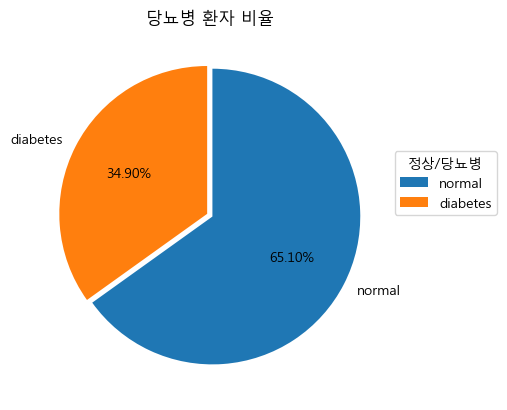

In [29]:
# pie 그래프로 출력
title = ['normal','diabetes']
explode = [0.02]*2

plt.pie(df['Outcome'].value_counts(), labels=title, autopct='%.2f%%', explode=explode, startangle=90, counterclock=False)
plt.title('당뇨병 환자 비율')
plt.legend(loc=(1,0.5),title='정상/당뇨병')
plt.show()

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_7592\2535543132.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=axs[0,0])  # 다이어그램 x,y축을 넣어서 하는 것이 아니라, x축 데이터만 입력하면 그래프 출력
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_7592\2535543132.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

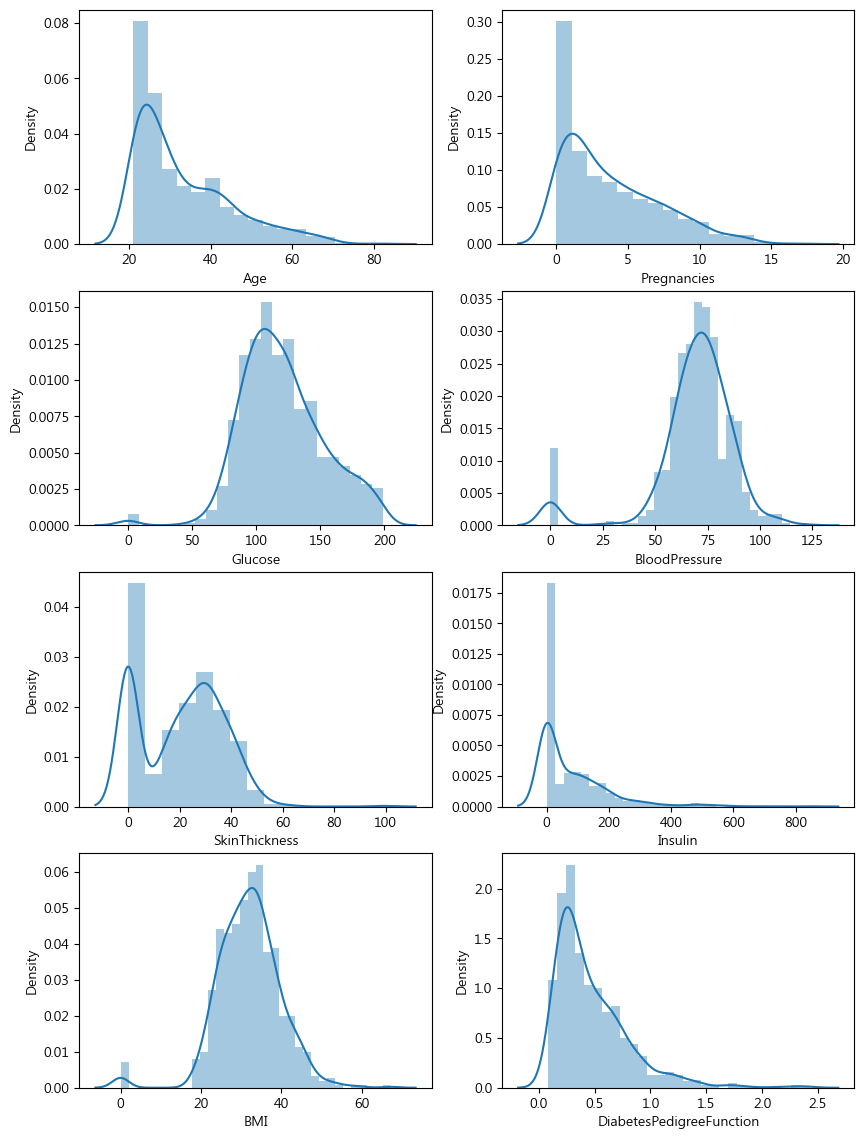

In [61]:
# 각 특성별 그래프를 출력하시오
# fig,axs = plt.subplots(4,2,figsize=(10,8))
import seaborn as sns

fig,axs = plt.subplots(4,2,figsize=(10,14))
# axs[0,0].bar(df['Age'],df.index)
sns.distplot(df['Age'],ax=axs[0,0])  # 다이어그램 x,y축을 넣어서 하는 것이 아니라, x축 데이터만 입력하면 그래프 출력
sns.distplot(df['Pregnancies'],ax=axs[0,1])
sns.distplot(df['Glucose'],ax=axs[1,0])
sns.distplot(df['BloodPressure'],ax=axs[1,1])
sns.distplot(df['SkinThickness'],ax=axs[2,0])
sns.distplot(df['Insulin'],ax=axs[2,1])
sns.distplot(df['BMI'],ax=axs[3,0])
sns.distplot(df['DiabetesPedigreeFunction'],ax=axs[3,1])

plt.show()


In [63]:
# 각 특성별 영향도를 확인하는 함수
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

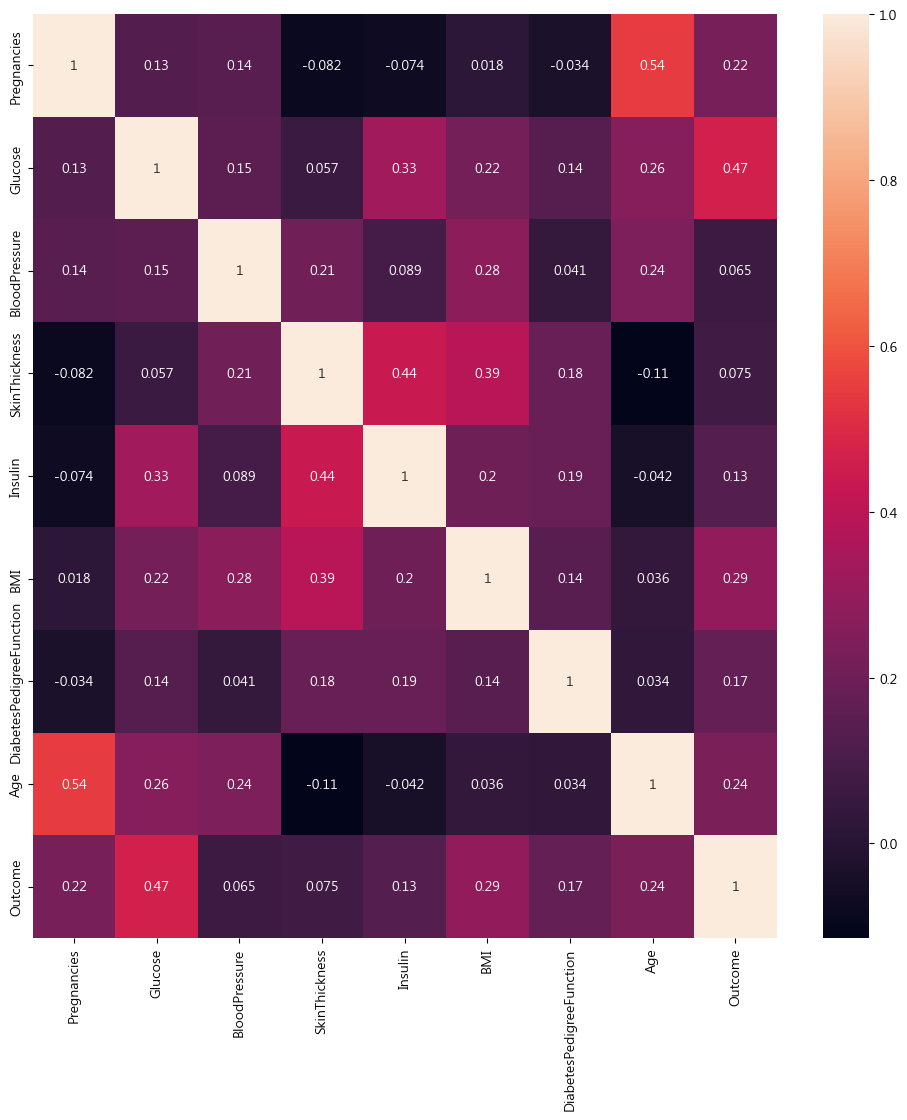

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)  # 각 특성별 영향도와 데이터 수치 출력

In [73]:
# 머신러닝
# 데이터 전처리 = train, test세트 분리
results = df['Outcome']
results

data = df.iloc[:,:-1]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [69]:
train_input,test_input,train_target,test_target = train_test_split(data,results,random_state=40)
train_input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
563,6,99,60,19,54,26.9,0.497,32
739,1,102,74,0,0,39.5,0.293,42
554,1,84,64,23,115,36.9,0.471,28
720,4,83,86,19,0,29.3,0.317,34
652,5,123,74,40,77,34.1,0.269,28
...,...,...,...,...,...,...,...,...
440,0,189,104,25,0,34.3,0.435,41
165,6,104,74,18,156,29.9,0.722,41
7,10,115,0,0,0,35.3,0.134,29
219,5,112,66,0,0,37.8,0.261,41


In [76]:
# 학습하기
# randomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_input, train_target)

RandomForestClassifier()

In [77]:
# 예측하기
predict = rfc.predict(test_input)

In [78]:
# 예측 정답률
score = rfc.score(test_input,test_target)
print("예측 정확도 : ", score)

예측 정확도 :  0.75


In [81]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [80]:
# 특성(feature) 중요도
rfc.feature_importances_

array([0.10853347, 0.2341004 , 0.0868152 , 0.07454947, 0.07145963,
       0.16221064, 0.12411806, 0.13821313])

In [89]:
# 각 특성의 영향도를 체크해서 다른 특성으로 변경(출처)
df_import = pd.DataFrame([df.columns[:-1],rfc.feature_importances_])
df_import = df_import.T
df_import.sort_values(ascending=False,inplace=True)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

<BarContainer object of 8 artists>

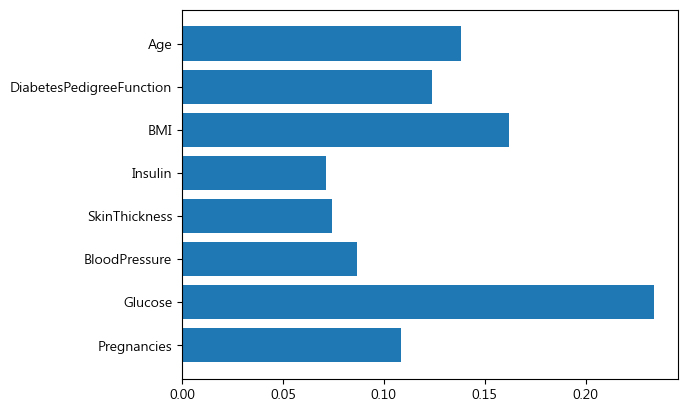

In [88]:
plt.barh(df_import[0],df_import[1])

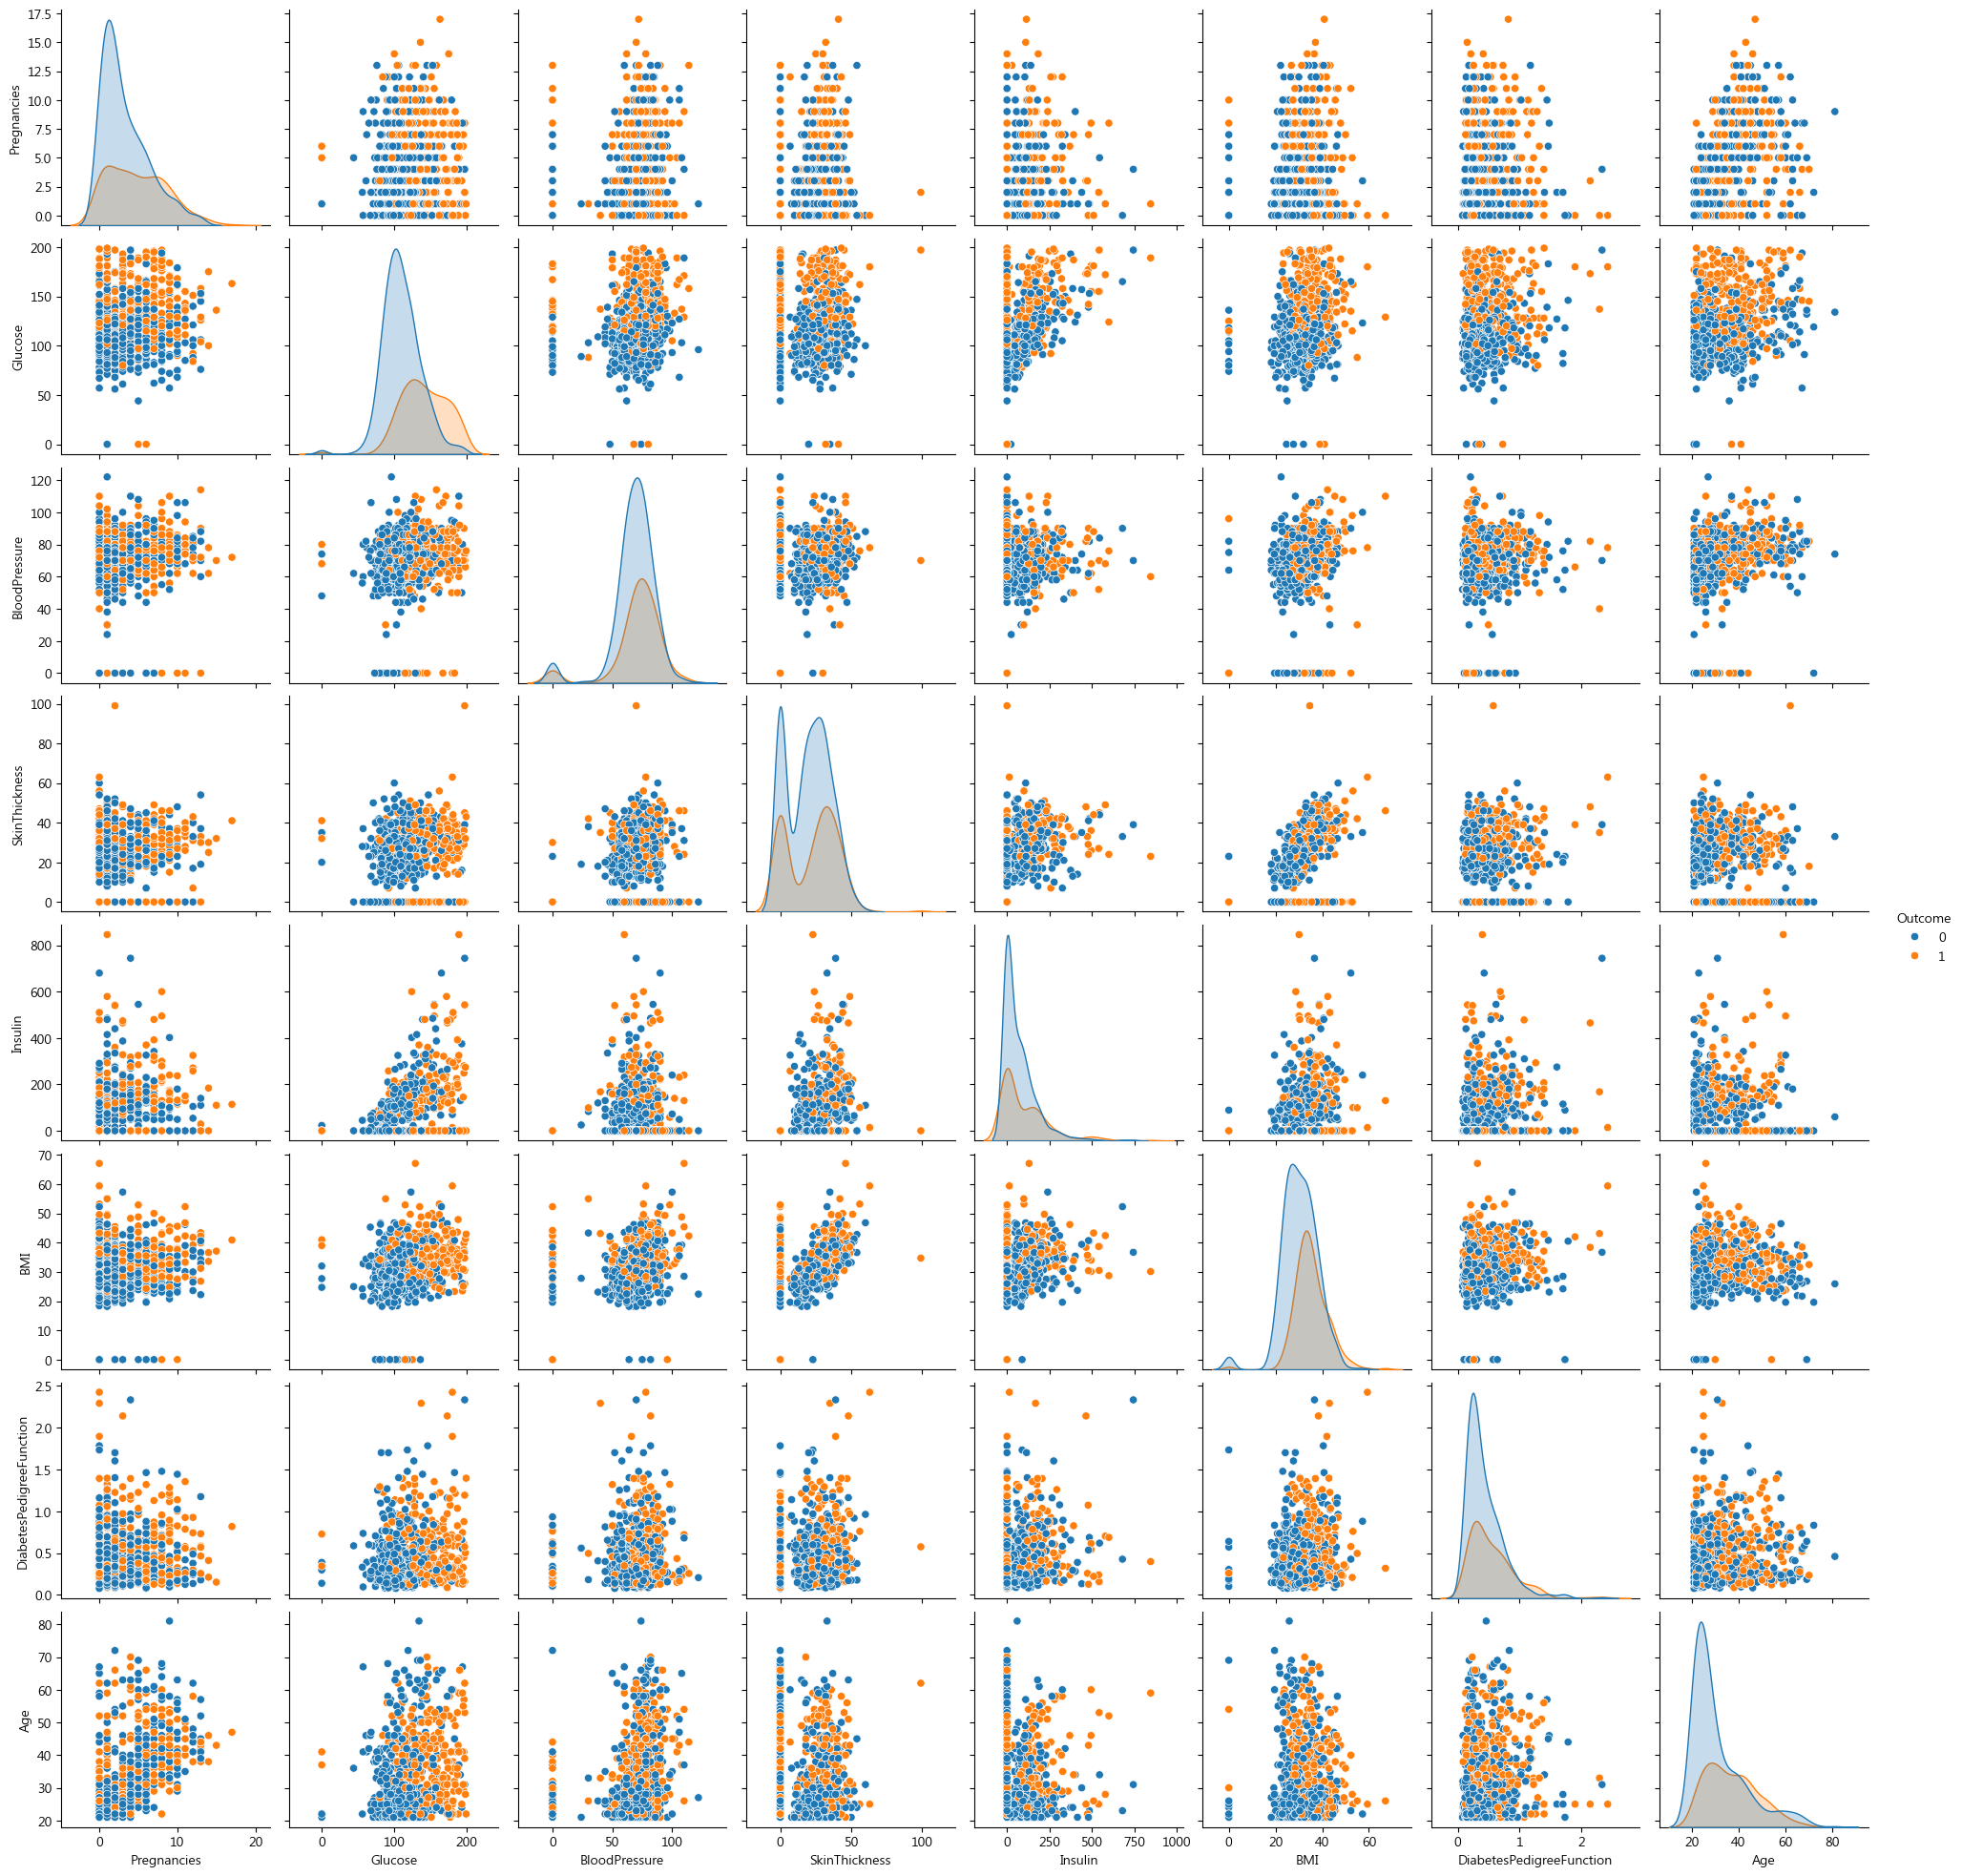

In [90]:
# corr()의 형태가 비슷ㅅㅁ
sns.pairplot(df,hue='Outcome')

In [102]:
df_zero_to_mean = df

In [103]:
# 각 특성별 0의 데이터처리
# Nan -> 0으로 처리
# Nan -> 평균으로 처리
# Nan데이터가 아니고, 0의 데이터여서, 0의 데이터를 Nan

# df_zero_to_mean['Glucose'].sort_values().head(10)
df_zero_to_mean['Glucose'].replace(0,np.NaN, inplace=True)
df_zero_to_mean['BloodPressure'].replace(0,np.NaN, inplace=True)
df_zero_to_mean['SkinThickness'].replace(0,np.NaN, inplace=True)
df_zero_to_mean['Insulin'].replace(0,np.NaN, inplace=True)
df_zero_to_mean['BMI'].replace(0,np.NaN, inplace=True)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_7592\3847788554.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero_to_mean['BMI'].replace(0,np.NaN, inplace=True)


In [106]:
df_zero_to_mean['Glucose'].fillna(df_zero_to_mean['Glucose'].mean(), inplace=True)
df_zero_to_mean['BloodPressure'].fillna(df_zero_to_mean['BloodPressure'].mean(), inplace=True)
df_zero_to_mean['SkinThickness'].fillna(df_zero_to_mean['SkinThickness'].mean(),inplace=True)
df_zero_to_mean['Insulin'].fillna(df_zero_to_mean['Insulin'].mean(),inplace=True)
df_zero_to_mean['BMI'].fillna(df_zero_to_mean['BMI'].mean(), inplace=True)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_7592\115792127.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero_to_mean['BMI'].fillna(df_zero_to_mean['BMI'].mean(), inplace=True)


In [107]:
df_zero_to_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [108]:
df_zero_to_mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [110]:
# 데이터 전처리 - train, test 세트
train_input,test_input,train_target,test_target = train_test_split(
    df_zero_to_mean.iloc[:,:-1],df_zero_to_mean['Outcome'], random_state=40 )

In [113]:
# 훈련시키기
rfc = RandomForestClassifier()
rfc.fit(train_input, train_target)

RandomForestClassifier()

In [115]:
# 예측하기
predict = rfc.predict(test_input)

In [117]:
# 예측률
score = rfc.score(test_input, test_target)
score

# 전과 별로 달라지지 않은 예측률

0.7604166666666666